# Insper: Prof Márcio

# Ciência dos dados: Engenharias

# Projeto 3: PNADC - Uso dos microdados de 2023
___


In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#%matplotlib inline

from scipy.stats import norm, probplot
import statsmodels.api as sm

from mpl_toolkits.mplot3d import Axes3D

# Para ter melhor print
from IPython.display import display

___
## URL das bases de dados da PNADC <br>
Os microdados dos quatro trimestre de 2023 estão armazenados, por ora, no **Dropbox da profa. Maria Kelly Venezuela**. <br>
Esses dados são de uso exclusivo dos alunos da Engenharia do Insper.

In [ ]:
# PRIMEIRO TRIMESTRE DE 2023
#url1 = 'https://www.dropbox.com/scl/fi/fv6fli3jyuinijotw9v6b/pnad23_1.csv?rlkey=1nq6xfd1fn7guz4nyhvwslp7p&st=qpr7odgu&dl=1'

# SEGUNDO TRIMESTRE DE 2023
url2 = 'https://www.dropbox.com/scl/fi/kvhduq8ocy2o1yj4l0ycc/pnad23_2.csv?rlkey=ni8nhwkv84xg59mp1cnd4gsto&st=yr8uiq5k&dl=1'

# TERCEIRO TRIMESTRE DE 2023
#url3 = 'https://www.dropbox.com/scl/fi/ol5m8stpd50e7endyal5d/pnad23_3.csv?rlkey=kik14kn4wqbcbdsmgq44z2i4s&st=9reoxjte&dl=1'

# QUARTO TRIMESTRE DE 2023
#url4 = 'https://www.dropbox.com/scl/fi/ksca0i4ybo6hno738pjcw/pnad23_4.csv?rlkey=e186niofxka6lmmlbkefr94zw&st=wntcupiu&dl=1'

___
# Leitura da base de dados - PNADC 2023:

### LEITURA DA BASE DE DADOS INTEIRA - 1o TRIMESTRE <br>
Exemplo de como ler a base de dados a partir da url. <br>
Troque o nome `url1` para o nome de outro trimestre que tenha interesse de analisar

In [ ]:
#pnad23_4_all = pd.read_csv(url4)

In [ ]:
#pnad23_4_all.Ano.value_counts()

Ano
2023    473206
Name: count, dtype: int64

___
### LEITURA DE ALGUMAS COLUNAS <br>
Para saber o significado das linhas e colunas, veja o arquivo Excel `dicionario_PNADC_microdados_trimestral.xlsx`

In [77]:
# Colunas selecionadas 1 trimestre:
colunas = ["UF", #Estado
           "Capital", #capital
           "V1022",  #"Rural ou Urbano" # "Situação do domicílio"

           "V1023", #Tipo de área
                               'V2001',  # N de pessoas na casa
                               "V2007",  # Sexo 
                               "V2009",   # Idade
                               "V2010", # Cor/etnia
           "V3001", #sabe ler e escrever
           "V3006", #Qual é o ano/série/semestre que ... frequenta?
           "V3007", #já concluiu algum outro curso de graduação?
           "V3008", #Anteriormente ... frequentou escola?
           
           "V3013", #Qual foi o último ano/série/semestre que ... concluiu com aprovação, neste curso que frequentou anteriormente
           "V3014", #concluiu este curso que frequentou anteriormente
           "V4001", #Na semana de ... a ... (semana de referência), ... trabalhou ou estagiou, durante pelo menos 1 hora, em alguma atividade remunerada em dinheiro?
           "V4002", #Na semana de ... a ... (semana de referência), ... trabalhou ou estagiou, durante pelo menos 1 hora, em alguma atividade remunerada em produtos, mercadorias, moradia, alimentação, etc.?
           "V4003", #Na semana de ... a ... (semana de referência), ... fez algum bico ou trabalhou em alguma atividade ocasional remunerada durante pelo menos 1 hora?  
           
           "V40121", #Trabalhador não remunerado
           
           "V403311", #Número da faixa do rendimento/retirada em dinheiro
           "V403312", #Qual era o rendimento bruto/retirada mensal que ... recebia/fazia normalmente nesse trabalho ? (valor em dinheiro)
           "V403422", #Qual foi o rendimento bruto/retirada que ... recebeu/fez nesse trabalho, no mês de referência ? (valor estimado dos produtos ou mercadorias)
           
           "VD3004", #Nível de instrução mais elevado alcançado (pessoas de 5 anos ou mais de idade) padronizado para o Ensino fundamental -  SISTEMA DE 9 ANOS
           "VD3005", #Anos de estudo (pessoas de 5 anos ou mais de idade) padronizado para o Ensino fundamental - SISTEMA DE 9 ANOS
           "VD3006", #Grupos de anos de estudo (pessoas de 5 anos ou mais de idade) padronizado para o Ensino fundamental  - SISTEMA DE 9 ANOS
           
          ]

# Leitura da base de dados filtrando apenas as colunas contidas na lista `colunas`
pnad23_2_small = pd.read_csv(url2, usecols=colunas)


In [78]:
pnad23_2_small

,UF,Capital,V1022,V1023,V2001,V2007,V2009,V2010,V3001,V3006,...,V4001,V4002,V4003,V40121,V403311,V403312,V403422,VD3004,VD3005,VD3006
0,11,11.0,1,1,2,1,30,4,1.0,NaN,...,1.0,NaN,NaN,NaN,5.0,5000.0,NaN,5.0,12.0,5.0
1,11,11.0,1,1,2,2,29,4,1.0,NaN,...,2.0,2.0,2.0,NaN,NaN,NaN,NaN,5.0,12.0,5.0
2,11,11.0,1,1,1,2,50,4,1.0,NaN,...,1.0,NaN,NaN,NaN,4.0,3500.0,NaN,7.0,16.0,6.0
3,11,11.0,1,1,2,2,25,4,1.0,NaN,...,2.0,2.0,2.0,NaN,NaN,NaN,NaN,5.0,12.0,5.0
4,11,11.0,1,1,2,2,2,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474570,53,53.0,1,1,2,1,38,1,1.0,NaN,...,1.0,NaN,NaN,NaN,6.0,10000.0,NaN,7.0,16.0,6.0
474571,53,53.0,1,1,2,2,30,1,1.0,NaN,...,1.0,NaN,NaN,NaN,3.0,2500.0,NaN,7.0,16.0,6.0
474572,53,53.0,1,1,3,1,51,1,1.0,NaN,...,1.0,NaN,NaN,NaN,5.0,5000.0,NaN,7.0,14.0,5.0
474573,53,53.0,1,1,3,2,56,1,1.0,NaN,...,1.0,NaN,NaN,NaN,5.0,5000.0,NaN,7.0,16.0,6.0


In [79]:
cols ={"V1023":"Tipo de área",
                               "V1022":"Rural ou Urbano", # "Situação do domicílio"
                               'V2001': 'Pessoas na Casa',
                               "V2007" : 'Sexo',
                               "V3001":"alfabetizado?",
                               "V2009": "Idade",
                               "V2010": "Cor",
    
                               "V3006":"ano/série/semestre que frequenta", 
                               "V3007":"já concluiu alguma graduação",
                               "V3008":"frequentou escola?",
                               
                               #"V3012":"concluiu com aprovação, pelo menos a primeira série",
                               "V3013":"último ano/série/semestre que concluiu com aprovação",
                               "V3014":"concluiu o curso",
                               "V4001":"Trabalha ou faz estágio remunerado", # Na semana trabalhou ou estagiou, durante pelo menos 1 hora, em atividade remunerada em dinheiro
                               "V4002":"Na semana trabalhou ou estagiou, durante pelo menos 1 hora, em alguma atividade remunerada em outra espécie?",
                               "V4003":"Na semana fez algum bico ou trabalhou em alguma atividade ocasional remunerada durante pelo menos 1 hora?",
                               #"V4004":"Na semana ajudou durante pelo menos 1 hora, sem receber pagamento, no trabalho remunerado de algum morador do domicílio ou de parente?",
                               #"V4009":"Quantos trabalhos tinha na semana", 
                               #"V4010":"Código da ocupação (cargo ou função)",  
                               #"V4012":"Nesse trabalho, era:",
                               "V40121":"Trabalhador não remunerado",
                               #"V4013":"Código da principal atividade desse negócio/empresa", 
                               "V403311":"Número da faixa do rendimento/retirada em dinheiro",
                               "V403312":"rendimento bruto mensal em dinheiro", 
                               "V403422":"Qual foi o rendimento bruto, valor estimado dos produtos ou mercadorias",
                               #"VD2003":"Número de componentes do domicílio (exclusive pensionista, empregado doméstico ou parente do empregado doméstico",
                               #"VD2004":"Espécie da unidade doméstica",
                               "VD3004":"Nível de instrução mais elevado alcançado (>= 5 anos)",
                               "VD3005":"Anos de estudo (>= 5 anos)",
                               "VD3006":"Grupos de anos de estudo (>= 5 anos)",
                               #"VD4001":"Condição em relação à força de trabalho na semana de referência para pessoas de 14 anos ou mais de idade",
                               #"VD4002":"Condição de ocupação na semana de referência para pessoas de idade >= 14 anos"
      }

Renomeando colunas para melhor entendimento 

In [80]:
pnad23_2_small.rename(columns = cols, inplace=True)

Vamos contar as frequencias absolutas de respostas com NaN para vermos quais variáveis já podem ser excluidas da análise por falta de informação

In [81]:

# Conta frequencias absolutas de todas respostas de todas colunas do banco de dados 
for coluna in pnad23_2_small: 
    display(pnad23_2_small[f'{coluna}'].value_counts().to_frame()) 

# PRINCIPAIS  
# Capital: 363062
# ano/série/semestre que frequenta: 375676
# já concluiu alguma graduação: 457181
# último ano/série/semestre que concluiu com aprovação: 190803
# Na semana trabalhou ou estagiou, durante pelo menos 1 hora, em alguma atividade remunerada em outra espécie?: 272107
# Na semana fez algum bico ou trabalhou em alguma atividade ocasional remunerada durante pelo menos 1 hora?: 272747
# Trabalhador não remunerado: 469389
# rendimento bruto mensal em dinheiro: 277657
# Qual foi o rendimento bruto, valor estimado dos produtos ou mercadorias: 474018


,count
UF,
35,37053
31,35028
33,33795
21,30802
42,30339
41,25267
43,24921
29,22946
23,22433


,count
Capital,
33.0,11791
35.0,9082
53.0,8992
13.0,6726
27.0,5444
31.0,4957
23.0,4792
12.0,4608
41.0,4199


,count
Rural ou Urbano,
1,348180
2,126395


,count
Tipo de área,
4,299054
1,111513
2,58653
3,5355


,count
Pessoas na Casa,
3,126600
4,113192
2,103120
5,56305
1,31968
6,23796
7,10283
8,4664
9,2466


,count
Sexo,
2,244738
1,229837


,count
Idade,
40,7885
41,7217
42,7196
43,7179
17,7085
...,...
106,5
107,3
108,2


,count
Cor,
4,236287
1,186881
2,45816
3,2792
5,2750
9,49


,count
alfabetizado?,
1.0,402520
2.0,44980


,count
ano/série/semestre que frequenta,
1.0,16283
3.0,15421
2.0,15344
8.0,8684
4.0,8670
6.0,8592
5.0,8464
7.0,8344
9.0,7713


,count
já concluiu alguma graduação,
2.0,15625
1.0,1769


,count
frequentou escola?,
1.0,316670
2.0,20213


,count
último ano/série/semestre que concluiu com aprovação,
3.0,113007
4.0,41228
8.0,36845
2.0,19852
5.0,19771
1.0,16638
6.0,13415
7.0,10228
10.0,8771


,count
concluiu o curso,
1.0,185088
2.0,119526


,count
Trabalha ou faz estágio remunerado,
2.0,202468
1.0,187786


,count
"Na semana trabalhou ou estagiou, durante pelo menos 1 hora, em alguma atividade remunerada em outra espécie?",
2.0,201828
1.0,640


,count
Na semana fez algum bico ou trabalhou em alguma atividade ocasional remunerada durante pelo menos 1 hora?,
2.0,195906
1.0,5922


,count
Trabalhador não remunerado,
1.0,4655
2.0,461
3.0,70


,count
Número da faixa do rendimento/retirada em dinheiro,
3.0,69436
2.0,50646
1.0,25203
4.0,20241
5.0,18651
6.0,9113
7.0,2921
8.0,707


,count
rendimento bruto mensal em dinheiro,
1320.0,18985
2000.0,14943
1500.0,11803
3000.0,10758
1302.0,9835
...,...
7291.0,1
2339.0,1
6350.0,1


,count
"Qual foi o rendimento bruto, valor estimado dos produtos ou mercadorias",
300.0,71
200.0,52
0.0,45
100.0,45
600.0,44
...,...
4500.0,1
85.0,1
25.0,1


,count
Nível de instrução mais elevado alcançado (>= 5 anos),
2.0,160750
5.0,108143
7.0,54634
1.0,41630
3.0,33927
4.0,30789
6.0,17627


,count
Anos de estudo (>= 5 anos),
12.0,106084
16.0,51842
0.0,41630
5.0,37132
9.0,33927
6.0,24698
4.0,18361
8.0,18284
7.0,17821


,count
Grupos de anos de estudo (>= 5 anos),
5.0,130322
3.0,97935
4.0,62974
2.0,62797
6.0,51842
1.0,41630


In [145]:
pnad23_2_small['UF'] = pnad23_2_small['UF'].astype('category')
pnad23_2_small['Capital'] = pnad23_2_small['Capital'].astype('category')
for coluna in cols.values():
    if coluna not in['rendimento bruto mensal em dinheiro','Pessoas na Casa','Idade',"Anos de estudo (>= 5 anos)"]:
        pnad23_2_small[coluna] = pnad23_2_small[coluna].astype('category')
pnad23_2_small.dtypes

UF                                                                                                              category
Capital                                                                                                         category
Rural ou Urbano                                                                                                 category
Tipo de área                                                                                                    category
Pessoas na Casa                                                                                                    int64
Sexo                                                                                                            category
Idade                                                                                                              int64
Cor                                                                                                             category
alfabetizado?                   

In [146]:
dados = pnad23_2_small[["UF","Rural ou Urbano",'Pessoas na Casa','Sexo',"alfabetizado?","Idade","Cor","frequentou escola?","rendimento bruto mensal em dinheiro","Trabalha ou faz estágio remunerado","Anos de estudo (>= 5 anos)"]]
dados.isnull().sum()
# Capital e Tipo de área foram tirados porque falam basicamente da mesma coisa e também não irão ter dados com diferenças tao significantes quanto os mostrados pelo UF.
# Nível de instrução tiramos pois anos de estudo é mais significativo 
# alfabetizado ou frequentou escola? (tirar ?)

UF                                          0
Rural ou Urbano                             0
Pessoas na Casa                             0
Sexo                                        0
alfabetizado?                           27075
Idade                                       0
Cor                                         0
frequentou escola?                     137692
rendimento bruto mensal em dinheiro    277657
Trabalha ou faz estágio remunerado      84321
Anos de estudo (>= 5 anos)              27075
dtype: int64

In [147]:
dados = dados.dropna()

Como algumas colunas estão cheias de NaN como resposta, iremos substituí-los por 0.0

In [148]:
#pnad23_2_small.fillna(0, inplace=True)
#pnad23_2_small

___

### IMPORTANTE ALTERAR DESCRIÇÃO DA CATEGORIA DAS VARIÁVEIS QUALITATIVAS 
Para saber o significado das categorias, veja o arquivo Excel `dicionario_PNADC_microdados_trimestral.xlsx`

In [149]:
# Alterando as categorias pelas suas descrições - VEJA AULA DO NOSSO CURSO   
#pnad23_1_small.Sexo = pnad23_1_small.Sexo.cat.rename_categories({1:'Homem', 2:'Mulher'})
#pnad23_1_small.Sexo.value_counts(True).round(3)*10

Filtrando Colunas que vamos realmente usar                       

### Análise Exploratória de Dados


Tabela de Medidas Resumo para entender melhor as Variáveis Quantitativas

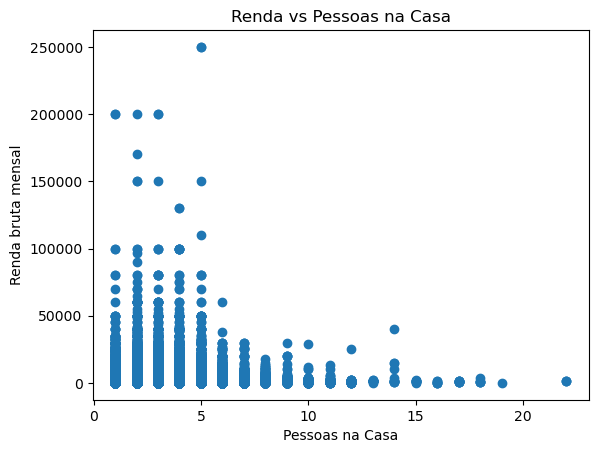

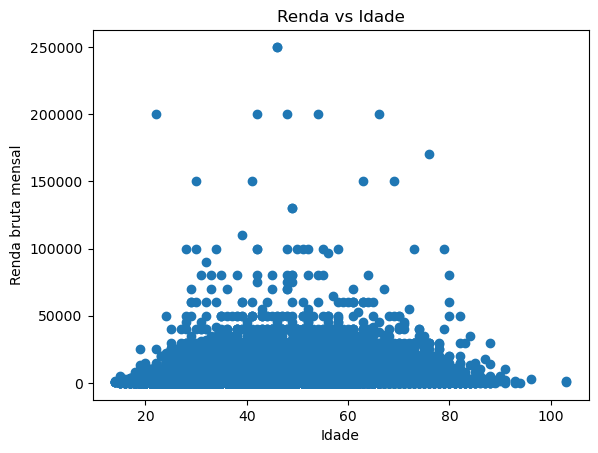

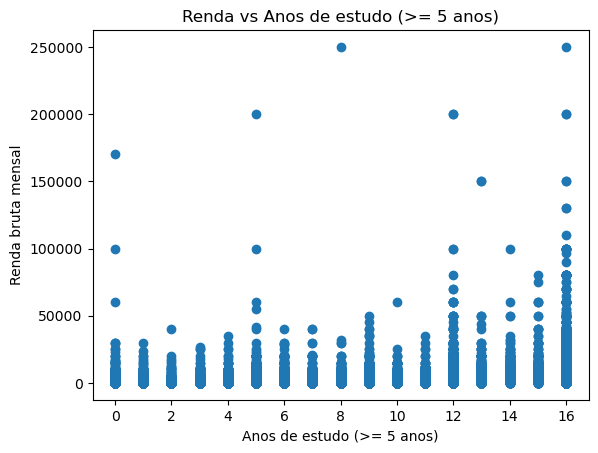

In [150]:
# Tabela de Medidas Resumo para Variáveis Quantitativas
dados_quantitativos = dados[["Pessoas na Casa","Idade","Anos de estudo (>= 5 anos)"]]

#Scatter das variáveis quantitativas:

#i = 221
for coluna in dados_quantitativos:
    #plt.subplot(i)
    plt.title(f"Renda vs {coluna}")
    plt.ylabel("Renda bruta mensal")
    plt.xlabel(f"{coluna}")
    plt.scatter(dados[coluna],dados["rendimento bruto mensal em dinheiro"])
    #i+=1
    plt.show()

Boxplots sobre as Variáveis Quantitativas Pessoas na casa, Renda Bruta Mensal, Idade e Anos de Estudo

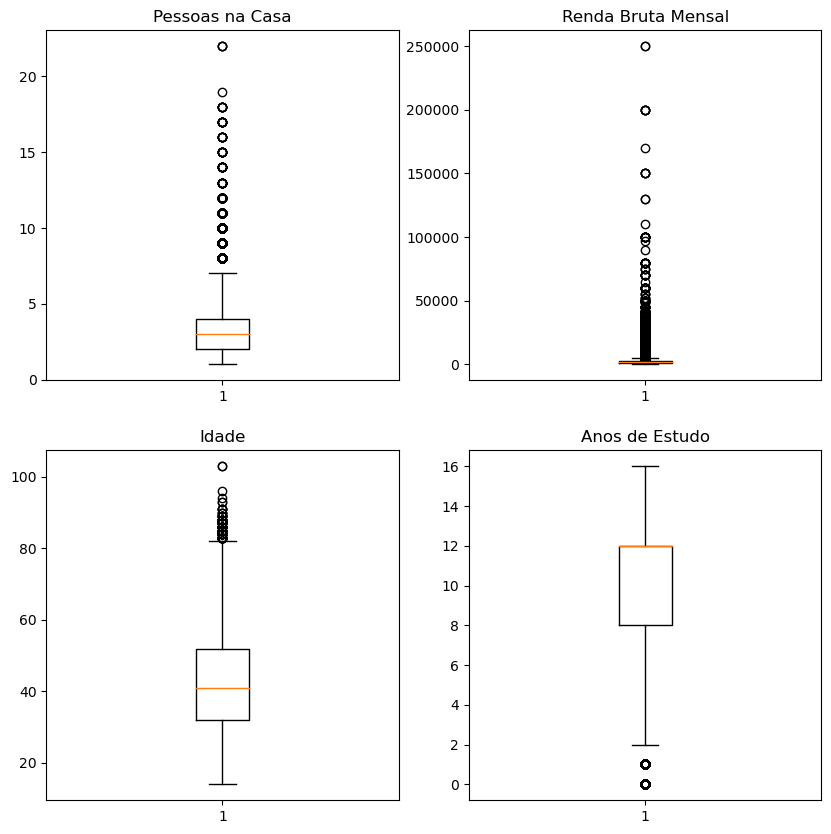

In [151]:
# Boxplots com as variaveis quantitativas
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.title("Pessoas na Casa")
plt.boxplot(dados["Pessoas na Casa"])

plt.subplot(222)
plt.title("Renda Bruta Mensal")
plt.boxplot(dados["rendimento bruto mensal em dinheiro"])

plt.subplot(223)
plt.title("Idade")
plt.boxplot(dados["Idade"])

plt.subplot(224)
plt.title("Anos de Estudo")
plt.boxplot(dados["Anos de estudo (>= 5 anos)"])

plt.show()

In [152]:
print(dados["Pessoas na Casa"].describe())
print(dados["rendimento bruto mensal em dinheiro"].describe())

count    179182.000000
mean          3.256650
std           1.444645
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          22.000000
Name: Pessoas na Casa, dtype: float64
count    179182.000000
mean       2639.907312
std        3976.559951
min          12.000000
25%        1302.000000
50%        1600.000000
75%        2800.000000
max      250000.000000
Name: rendimento bruto mensal em dinheiro, dtype: float64


In [153]:
print(dados["Idade"].describe())
print(dados["Anos de estudo (>= 5 anos)"].describe())

count    179182.000000
mean         42.012172
std          13.216653
min          14.000000
25%          32.000000
50%          41.000000
75%          52.000000
max         103.000000
Name: Idade, dtype: float64
count    179182.000000
mean         10.553521
std           4.314803
min           0.000000
25%           8.000000
50%          12.000000
75%          12.000000
max          16.000000
Name: Anos de estudo (>= 5 anos), dtype: float64


Correlações entre Target e Features 

In [154]:
# Correlações das Features Quantidade de Pessoas, Idade e Anos de Estudi com a nossa target Renda

corr_Renda_nPessoas = dados["rendimento bruto mensal em dinheiro"].corr(dados["Pessoas na Casa"])
corr_Renda_Idade = dados["rendimento bruto mensal em dinheiro"].corr(dados["Idade"])
corr_Renda_AnosEstudos = dados["rendimento bruto mensal em dinheiro"].corr(dados["Anos de estudo (>= 5 anos)"])

display("Correlação Renda e Quantidade de Pessoas",corr_Renda_nPessoas)
display("Correlação entre renda e Idade",corr_Renda_Idade)
display("Correlação entre Renda e Anos de Estudos",corr_Renda_AnosEstudos)

'Correlação Renda e Quantidade de Pessoas'

-0.047413149418969416

'Correlação entre renda e Idade'

0.09534784632161603

'Correlação entre Renda e Anos de Estudos'

0.28228618085519946

Histogramas para as Variáveis Qualitativas

In [155]:
dados_qualitativos = dados[["UF",	"Rural ou Urbano",	"Sexo",	"alfabetizado?",	"Cor",	"frequentou escola?"	,	"Trabalha ou faz estágio remunerado"]]
# #plt.figure(figsize=(25,50))
# #i = 1

# for coluna in dados_qualitativos:
#     plt.title(f"{coluna}")
#     #plt.subplot(8,2,i)
#     plt.hist(dados[f'{coluna}'],density=True,bins=10, edgecolor = 'white')
#     plt.show()
#     #i+=1

In [156]:
# Substituir 0 por valor mais frequente:


In [157]:
# for coluna in dados_qualitativos:
#     plt.title(f"{coluna}")
#     plt.boxplot(dados[f'{coluna}'])
#     plt.show()

In [179]:
dq = ["UF",	"Rural ou Urbano",	"Sexo",	"alfabetizado?",	"Cor",	"frequentou escola?"	,	"Trabalha ou faz estágio remunerado"]
a = pd.get_dummies(dados, drop_first=True)
#dados = d 

In [180]:
for d in dq:
    cats = dados[d].unique().tolist()
    base = dados[[d, "rendimento bruto mensal em dinheiro"]]
    for c in cats:
        cond = base[d] == c
        base_ef = base.loc[cond, :]
        # print(f'                  Coluna {d}, rotulo: {c}\n{base_ef.describe()}\n')
        # plt.title(f"{d} : {c}")
        # plt.hist(base_ef["rendimento bruto mensal em dinheiro"],density=True,bins=20)
        # plt.show()
        # plt.boxplot(base_ef["rendimento bruto mensal em dinheiro"])
        # plt.show()

In [181]:
def regress(Y,X):

    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results


display(a)

,Pessoas na Casa,Idade,rendimento bruto mensal em dinheiro,Anos de estudo (>= 5 anos),UF_12,UF_13,UF_14,UF_15,UF_16,UF_17,...,Rural ou Urbano_2,Sexo_2,alfabetizado?_2.0,Cor_2,Cor_3,Cor_4,Cor_5,Cor_9,frequentou escola?_2.0,Trabalha ou faz estágio remunerado_2.0
0,2,30,5000.0,12.0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,1,50,3500.0,16.0,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
7,3,54,3700.0,16.0,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
9,3,36,3300.0,9.0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
11,2,33,3500.0,12.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474566,2,48,5000.0,13.0,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
474568,3,28,3500.0,16.0,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
474570,2,38,10000.0,16.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
474572,3,51,5000.0,14.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:

#####ERRO A PARTIR DESSA LINHA

X = a.drop("rendimento bruto mensal em dinheiro", axis=1)
Y = a["rendimento bruto mensal em dinheiro"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [198]:
results = regress(y_train.to_numpy(),X_train.to_numpy())
results.summary()

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [109]:
condicao = True
while condicao:
    p = results.pvalues.max()
    
    if p > 0.1:
        p_ = results.pvalues.idxmax()
        X = X.drop(columns=[p_])
        results = sm.OLS(Y,X).fit()
    else:
        condicao = False

In [110]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         OLS Regression Results                                         
========================================================================================================
Dep. Variable:     rendimento bruto mensal em dinheiro   R-squared (uncentered):                   0.405
Model:                                             OLS   Adj. R-squared (uncentered):              0.405
Method:                                  Least Squares   F-statistic:                          1.356e+04
Date:                                 Thu, 14 Nov 2024   Prob (F-statistic):                        0.00
Time:                                         17:12:36   Log-Likelihood:                     -1.7255e+06
No. Observations:                               179182   AIC:                                  3.451e+06
Df Residuals:                                   179173   BIC:                                  3.451e+06
Df Model:                                            9                                                  
Covariance Type:                             nonrobust                                                  
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
UF                                    21.6847      0.776     27.951      0.000      20.164      23.205
Rural ou Urbano                     -430.1213     20.901    -20.579      0.000    -471.086    -389.156
Sexo                               -1122.7257     17.868    -62.833      0.000   -1157.747   -1087.704
alfabetizado?                        287.3604     53.523      5.369      0.000     182.457     392.263
Idade                                 45.8578      0.660     69.521      0.000      44.565      47.151
Cor                                 -241.1718      6.175    -39.057      0.000    -253.274    -229.069
frequentou escola?                   564.2490     61.640      9.154      0.000     443.436     685.062
Trabalha ou faz estágio remunerado -1142.1397     38.012    -30.047      0.000   -1216.643   -1067.637
Anos de estudo (>= 5 anos)           291.2705      2.005    145.244      0.000     287.340     295.201
==============================================================================
Omnibus:                   357918.907   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       2966390474.331
Skew:                          15.895   Prob(JB):                         0.00
Kurtosis:                     632.534   Cond. No.                         473.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

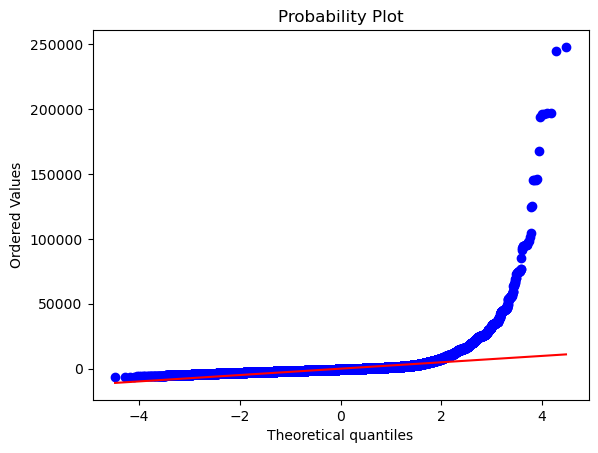

In [111]:
from scipy import stats
stats.probplot(results.resid,  dist='norm', plot=plt)
plt.show()